# Demo tracking output from preprocessed track data

Read in the track data

In [1]:
import pickle

paper_preproc = pickle.load(open("../example_data/pre_CTRL_2012_2013.pkl", 'rb'))

paper_preproc = paper_preproc[(paper_preproc['long_duration'] >= 24) & (paper_preproc['100k_between']==True)].copy()

paper_preproc.head()

,area,convex_area,coords,coords_50p,coords_90p,eccentricity,geometry,intensity_variance,major_axis_length,max_intensity,...,storm_num,dataset,season,total_SWE_km3,duration,area_50_p,area_90_p,100k_between,large_slice,long_duration
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-04 09:00:00,141664.0,199872.0,"[[659, 683], [659, 684], [659, 685], [659, 686...","[[664, 686], [665, 685], [665, 686], [665, 687...","[[673, 689], [674, 689], [674, 690], [675, 689...",0.911391,"POLYGON ((710 630, 691 634, 680 639, 676 641, ...",0.500083,724.124229,3.304748,...,CTRL_2012_2013_101,CTRL,2012_2013,0.123856,84.0,88528,11312,True,1.0,54.0
2012-10-04 12:00:00,343824.0,480336.0,"[[658, 686], [658, 687], [658, 688], [658, 689...","[[669, 690], [669, 691], [669, 693], [669, 694...","[[705, 719], [706, 711], [706, 719], [706, 720...",0.968593,"POLYGON ((692 652, 690 653, 687 655, 686 656, ...",0.931972,1456.897648,7.807863,...,CTRL_2012_2013_101,CTRL,2012_2013,0.322211,84.0,200048,40928,True,1.0,54.0
2012-10-04 15:00:00,343504.0,452800.0,"[[692, 713], [692, 714], [693, 713], [693, 714...","[[703, 719], [703, 720], [704, 719], [704, 720...","[[711, 737], [711, 738], [711, 739], [712, 737...",0.942244,"POLYGON ((730 687, 726 689, 692 713, 692 714, ...",1.976959,1237.389848,9.538871,...,CTRL_2012_2013_101,CTRL,2012_2013,0.414629,84.0,224432,63152,True,1.0,54.0
2012-10-04 18:00:00,321936.0,452800.0,"[[706, 721], [706, 722], [707, 721], [707, 722...","[[719, 767], [719, 768], [720, 768], [720, 769...","[[732, 760], [732, 761], [732, 762], [733, 759...",0.921177,"POLYGON ((794 687, 708 720, 706 721, 706 722, ...",2.491788,1137.923048,10.356344,...,CTRL_2012_2013_101,CTRL,2012_2013,0.426544,84.0,215152,61232,True,1.0,54.0
2012-10-04 21:00:00,345168.0,479568.0,"[[736, 730], [737, 717], [737, 718], [737, 729...","[[742, 768], [742, 769], [743, 767], [743, 768...","[[756, 762], [756, 763], [756, 774], [756, 775...",0.903394,"POLYGON ((837 672, 834 673, 764 700, 740 712, ...",7.145257,1122.095829,15.378941,...,CTRL_2012_2013_101,CTRL,2012_2013,0.702544,84.0,248656,90784,True,1.0,54.0


Read in the SWE data

In [2]:
import xarray as xr

snow = xr.open_dataset("../example_data/3H_sum_SNOW_ACC_CTRL_2012-2013.nc")

snow

<xarray.Dataset>
Dimensions:      (Time: 1697, south_north: 1015, west_east: 1359)
Coordinates:
  * Time         (Time) datetime64[ns] 2012-10-01 ... 2013-05-01
    XLAT         (south_north, west_east) float32 ...
    XLONG        (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    SNOW_ACC_NC  (Time, south_north, west_east) float32 ...
    XTIME        (Time) float32 ...

Find a long track

In [3]:
paper_preproc[paper_preproc.duration >= 100].groupby('storm_num').first()

,area,convex_area,coords,coords_50p,coords_90p,eccentricity,geometry,intensity_variance,major_axis_length,max_intensity,...,datetime,dataset,season,total_SWE_km3,duration,area_50_p,area_90_p,100k_between,large_slice,long_duration
storm_num,,,,,,,,,,,,,,,,,,,,,
CTRL_2012_2013_11122,168848.0,236400.0,"[[780, 511], [780, 512], [780, 513], [781, 509...","[[795, 475], [796, 475], [796, 487], [796, 488...",[],0.986151,"POLYGON ((1000 298, 988 303, 983 306, 956 323,...",0.057240,1208.501152,1.360597,...,2012-11-08 09:00:00,CTRL,2012_2013,0.071095,105.0,70464,0,True,1.0,96.0
CTRL_2012_2013_13292,176704.0,240224.0,"[[793, 497], [793, 498], [794, 496], [794, 497...","[[798, 500], [798, 501], [798, 502], [799, 500...","[[810, 517], [810, 518], [810, 519], [810, 520...",0.919865,"POLYGON ((844 422, 820 438, 793 497, 793 498, ...",3.183534,817.364837,9.089142,...,2012-11-21 18:00:00,CTRL,2012_2013,0.317528,129.0,126352,58000,True,1.0,114.0
CTRL_2012_2013_15341,113968.0,133232.0,"[[864, 455], [864, 456], [865, 450], [865, 451...","[[895, 427], [895, 428], [895, 429], [896, 424...",[],0.965965,"POLYGON ((991 302, 988 303, 983 306, 972 313, ...",0.174565,813.845120,1.713027,...,2012-11-28 18:00:00,CTRL,2012_2013,0.066142,132.0,55488,0,True,1.0,108.0
CTRL_2012_2013_16092,135104.0,154816.0,"[[899, 407], [899, 408], [899, 409], [899, 410...","[[920, 392], [920, 393], [920, 394], [920, 395...","[[996, 300], [996, 301], [997, 300], [997, 301...",0.875785,"POLYGON ((1013 293, 1004 296, 988 303, 983 306...",0.262732,627.321526,2.763327,...,2012-12-01 06:00:00,CTRL,2012_2013,0.103883,129.0,84736,496,True,1.0,111.0
CTRL_2012_2013_17327,102976.0,136544.0,"[[593, 594], [593, 595], [593, 596], [593, 597...","[[596, 591], [597, 589], [597, 590], [597, 591...","[[619, 571], [619, 572], [619, 573], [619, 574...",0.925505,"POLYGON ((687 468, 673 476, 668 481, 631 522, ...",2.658031,630.497185,7.997395,...,2012-12-07 06:00:00,CTRL,2012_2013,0.159220,147.0,73712,22672,True,1.0,105.0
CTRL_2012_2013_18129,132768.0,159808.0,"[[924, 658], [924, 659], [924, 660], [924, 661...","[[927, 641], [927, 642], [927, 643], [927, 644...",[],0.877926,"POLYGON ((975 584, 933 617, 932 619, 925 639, ...",0.041487,627.147741,1.137058,...,2012-12-10 06:00:00,CTRL,2012_2013,0.052573,105.0,45376,0,True,1.0,69.0
CTRL_2012_2013_18538,201632.0,259424.0,"[[852, 517], [852, 518], [853, 514], [853, 515...","[[878, 503], [879, 413], [879, 414], [879, 415...","[[936, 385], [936, 386], [937, 383], [937, 384...",0.884559,"POLYGON ((988 318, 985 320, 943 350, 884 396, ...",0.535480,793.191075,6.122748,...,2012-12-11 09:00:00,CTRL,2012_2013,0.149731,117.0,113648,12368,True,1.0,96.0
CTRL_2012_2013_19491,177680.0,222688.0,"[[907, 938], [907, 939], [907, 940], [908, 936...","[[925, 916], [925, 917], [925, 918], [925, 919...","[[955, 858], [955, 859], [955, 860], [956, 858...",0.880580,"POLYGON ((989 749, 983 750, 970 753, 934 792, ...",0.238498,750.317116,2.754562,...,2012-12-15 18:00:00,CTRL,2012_2013,0.108227,102.0,86704,1296,True,1.0,84.0
CTRL_2012_2013_20508,168640.0,218512.0,"[[453, 544], [453, 545], [453, 546], [453, 547...","[[456, 547], [457, 547], [457, 548], [458, 547...","[[488, 578], [488, 579], [488, 580], [488, 581...",0.847293,"POLYGON ((453 544, 453 550, 454 553, 475 596, ...",1.734005,706.309089,6.594763,...,2012-12-19 18:00:00,CTRL,2012_2013,0.288249,117.0,133056,58032,True,1.0,99.0


Lets focus on storm 'CTRL_2012_2013_22164'

In [4]:
example = paper_preproc[paper_preproc.storm_num=='CTRL_2012_2013_22164'].copy()

example.head()

,area,convex_area,coords,coords_50p,coords_90p,eccentricity,geometry,intensity_variance,major_axis_length,max_intensity,...,storm_num,dataset,season,total_SWE_km3,duration,area_50_p,area_90_p,100k_between,large_slice,long_duration
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-25 18:00:00,288224.0,412160.0,"[[306, 655], [307, 654], [307, 655], [307, 656...","[[320, 691], [320, 692], [320, 697], [320, 698...","[[324, 696], [324, 697], [325, 694], [325, 695...",0.867202,"POLYGON ((354 574, 352 575, 328 594, 326 596, ...",3.422007,996.176731,13.686356,...,CTRL_2012_2013_22164,CTRL,2012_2013,0.495751,114.0,209472,82944,True,1.0,108.0
2012-12-25 21:00:00,251936.0,369728.0,"[[302, 701], [302, 702], [303, 671], [303, 672...","[[306, 697], [306, 698], [306, 699], [306, 700...","[[319, 700], [319, 701], [319, 702], [319, 703...",0.886644,"POLYGON ((361 631, 353 634, 335 641, 333 642, ...",5.116981,996.965312,13.185693,...,CTRL_2012_2013_22164,CTRL,2012_2013,0.546551,114.0,194640,92304,True,1.0,108.0
2012-12-26 00:00:00,289824.0,419744.0,"[[296, 726], [297, 717], [297, 718], [297, 719...","[[304, 758], [304, 759], [304, 760], [304, 761...","[[308, 755], [308, 756], [308, 757], [309, 754...",0.960791,"POLYGON ((346 648, 340 650, 338 651, 327 660, ...",7.296446,1333.900873,14.548054,...,CTRL_2012_2013_22164,CTRL,2012_2013,0.783124,114.0,226528,134560,True,1.0,108.0
2012-12-26 03:00:00,314736.0,409344.0,"[[290, 734], [290, 735], [291, 733], [291, 734...","[[306, 767], [306, 768], [306, 769], [306, 770...","[[312, 765], [312, 766], [312, 767], [313, 764...",0.969733,"POLYGON ((321 705, 299 722, 294 726, 293 727, ...",6.300995,1406.852836,13.410618,...,CTRL_2012_2013_22164,CTRL,2012_2013,0.858427,114.0,240848,154208,True,1.0,108.0
2012-12-26 06:00:00,314704.0,459648.0,"[[297, 800], [297, 801], [298, 796], [298, 800...","[[326, 801], [326, 802], [326, 803], [326, 804...","[[345, 817], [345, 818], [345, 819], [346, 815...",0.964836,"POLYGON ((319 743, 315 745, 314 746, 305 756, ...",6.062858,1466.374525,10.357695,...,CTRL_2012_2013_22164,CTRL,2012_2013,0.767673,114.0,232016,127952,True,1.0,108.0


### Sum SWE over the period that the storm existed

In [5]:
import numpy as np

start = np.min(example.index.values)
end = np.max(example.index.values)

print(start, end)

2012-12-25T18:00:00.000000000 2012-12-30T06:00:00.000000000


same as...

In [6]:
start = example.index.values[0]
end = example.index.values[-1]

print(start, end)

2012-12-25T18:00:00.000000000 2012-12-30T06:00:00.000000000


Select data from xarray dataset

In [7]:
swe_sum = snow.sel(Time=slice(start, end))

swe_sum

<xarray.Dataset>
Dimensions:      (Time: 37, south_north: 1015, west_east: 1359)
Coordinates:
  * Time         (Time) datetime64[ns] 2012-12-25T18:00:00 ... 2012-12-30T06:00:00
    XLAT         (south_north, west_east) float32 ...
    XLONG        (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    SNOW_ACC_NC  (Time, south_north, west_east) float32 ...
    XTIME        (Time) float32 ...

Sum the data

In [8]:
swe_sum = swe_sum.sum('Time')

swe_sum

<xarray.Dataset>
Dimensions:      (south_north: 1015, west_east: 1359)
Coordinates:
    XLAT         (south_north, west_east) float32 ...
    XLONG        (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    SNOW_ACC_NC  (south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    XTIME        float32 714651260.0

same as...

In [9]:
import pandas as pd

manual_swe_sum = np.zeros(shape=(1015, 1359), dtype=np.float32)

for time in pd.date_range(start, end, freq='3H'):

    tmp_swe = snow.sel(Time=time)
    
    manual_swe_sum += tmp_swe.SNOW_ACC_NC.values

plot difference..

Difference of sums 0.0


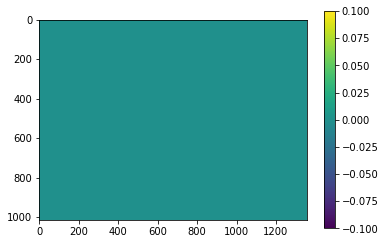

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(swe_sum.SNOW_ACC_NC.values - manual_swe_sum)

plt.colorbar()

print("Difference of sums", np.sum(swe_sum.SNOW_ACC_NC.values) - np.sum(manual_swe_sum))

# Plot snow totals over this period

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
%matplotlib inline

from map_help import *

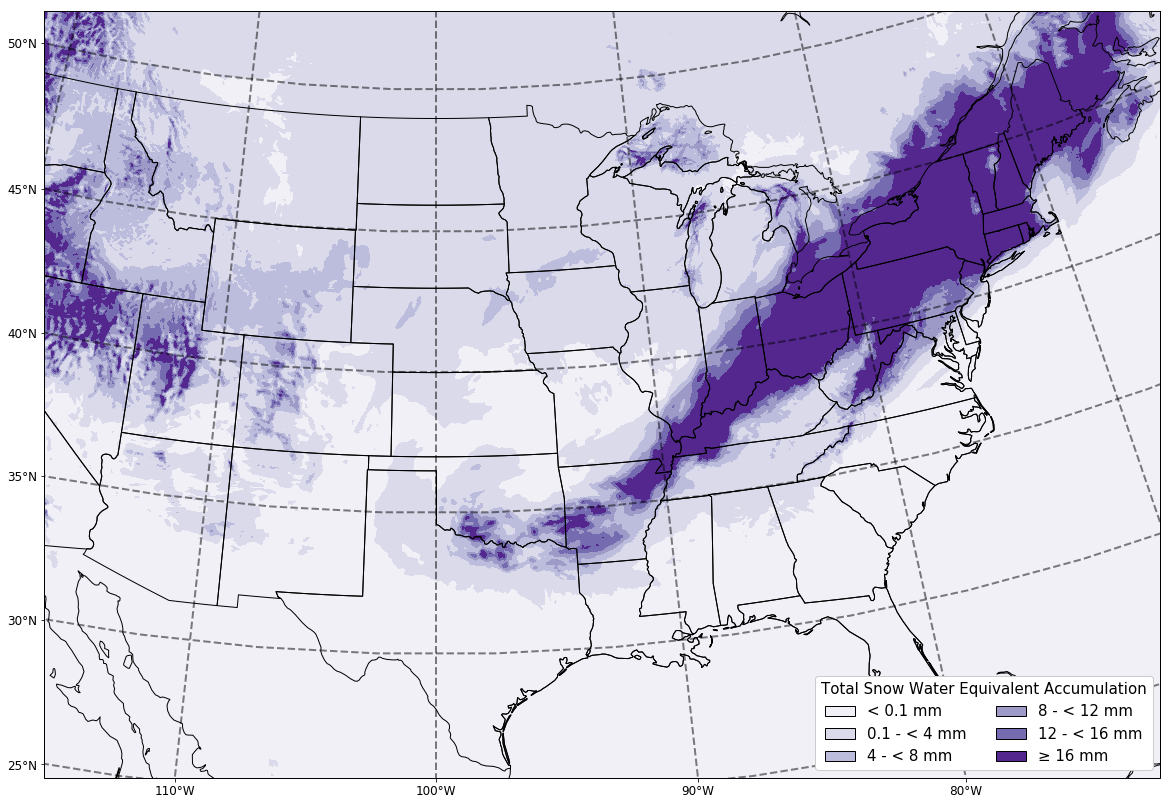

In [12]:
plt.rcParams['figure.figsize'] = 20, 20

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

projection = ccrs.LambertConformal(central_longitude=-100)
axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-115, -72, 25, 50], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
    
    classes = [0,.1,4,8,12,16,50]
    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
    legend_boundaries = ["< 0.1 mm", "0.1 - < 4 mm", "4 - < 8 mm", "8 - < 12 mm", 
                     '12 - < 16 mm', "≥ 16 mm"]
    legend_title = "Total Snow Water Equivalent Accumulation"
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
    
    ax.pcolormesh(swe_sum.XLONG.values, swe_sum.XLAT.values, swe_sum.SNOW_ACC_NC, 
              cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Plot the 0th Percentile Swath Extent

In [13]:
acc = np.zeros(shape=(1015, 1359))

for rid, row in example.iterrows():
    
    x = row.coords[:,0]
    y = row.coords[:,1]
    acc[x,y] = 1

C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\p37\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


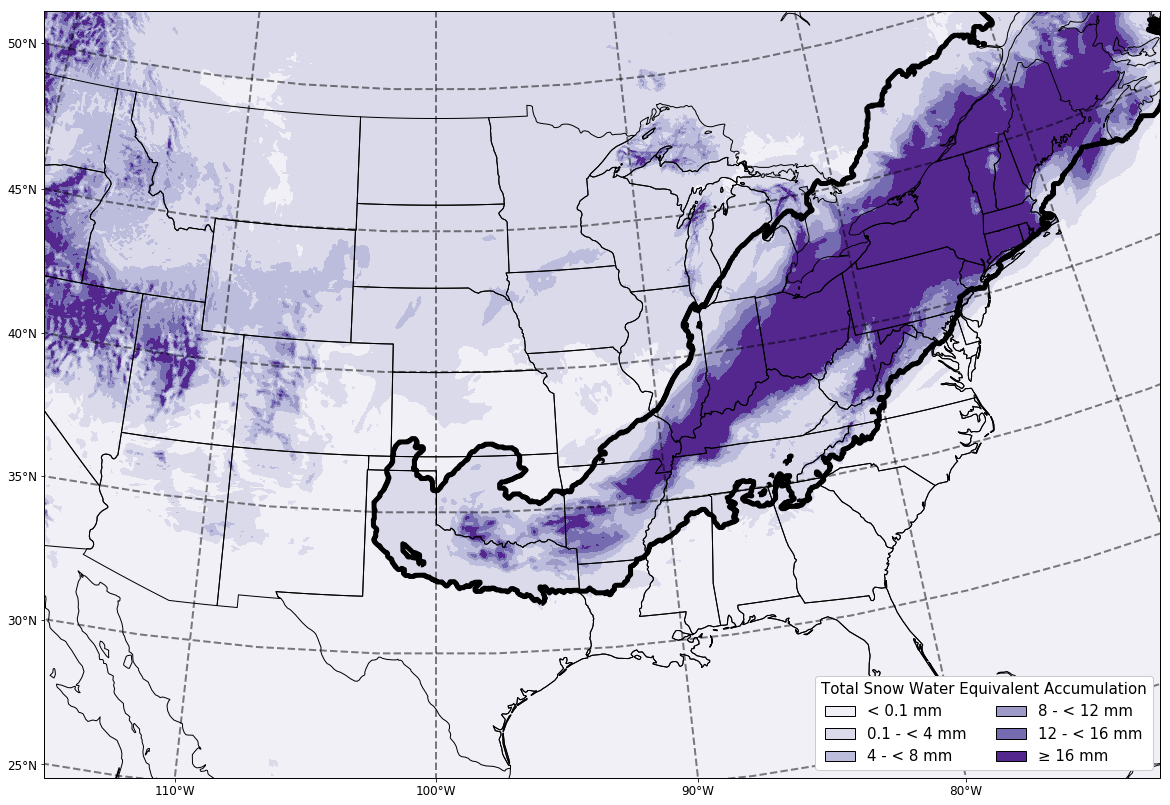

In [14]:
fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-115, -72, 25, 50], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
    
    classes = [0,.1,4,8,12,16,50]
    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
    legend_boundaries = ["< 0.1 mm", "0.1 - < 4 mm", "4 - < 8 mm", "8 - < 12 mm", 
                     '12 - < 16 mm', "≥ 16 mm"]
    legend_title = "Total Snow Water Equivalent Accumulation"
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
    
    ax.pcolormesh(swe_sum.XLONG.values, swe_sum.XLAT.values, swe_sum.SNOW_ACC_NC, 
              cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.contour(swe_sum.XLONG.values, swe_sum.XLAT.values, acc, 
               levels=[0,1], colors=['k',], linewidths=5, transform=ccrs.PlateCarree())

# Plot 3H accumulation and slice at 2012-12-26 00:00:00 UTC 

In [15]:
one_slice = example[example.index=='2012-12-26 00:00:00']

one_3h = snow.sel(Time='2012-12-26 00:00:00')

acc = np.zeros(shape=(1015, 1359))

for rid, row in one_slice.iterrows():
    
    x = row.coords[:,0]
    y = row.coords[:,1]
    acc[x,y] = 1

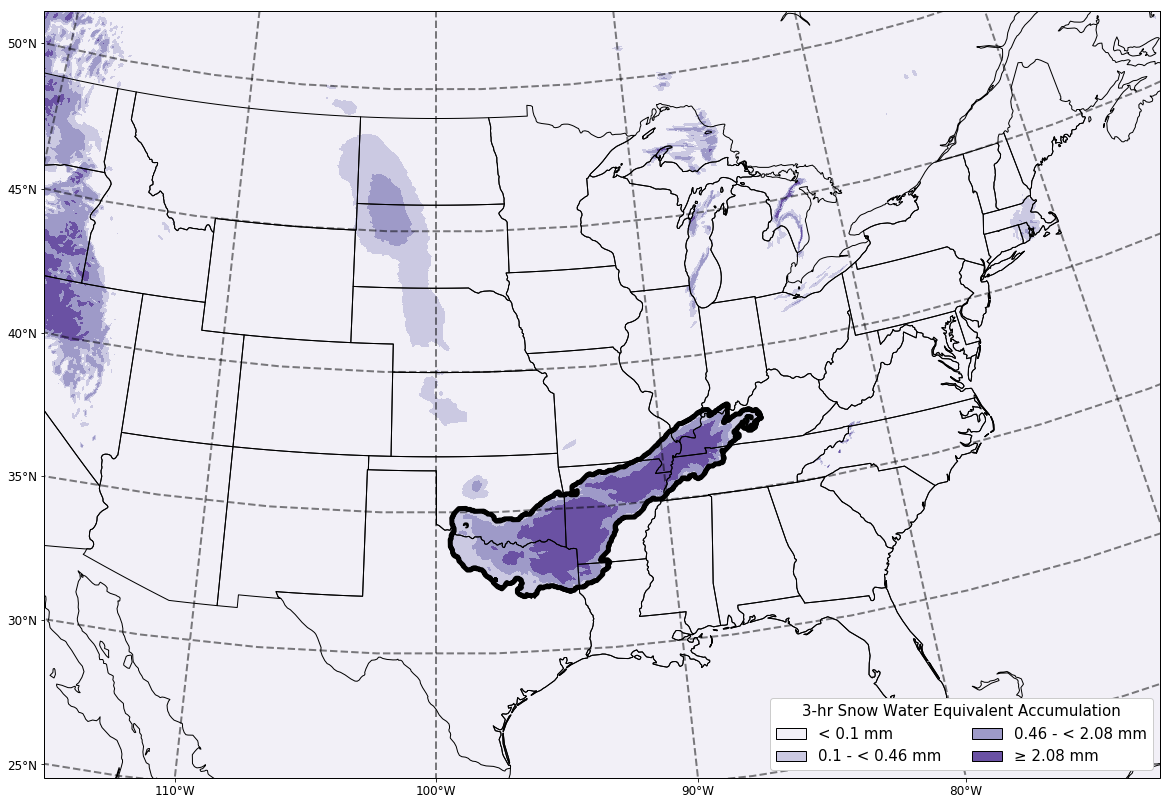

In [16]:
fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-115, -72, 25, 50], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
    
    classes = [0,.1,.46,2.08,50]

    legend_colors = ['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3']
    legend_boundaries = ["< 0.1 mm", "0.1 - < 0.46 mm", "0.46 - < 2.08 mm", "≥ 2.08 mm"]
    legend_title = "3-hr Snow Water Equivalent Accumulation"
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
    
    ax.pcolormesh(swe_sum.XLONG.values, swe_sum.XLAT.values, one_3h.SNOW_ACC_NC, 
              cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.contour(swe_sum.XLONG.values, swe_sum.XLAT.values, acc, 
               levels=[0,1], colors=['k',], linewidths=5, transform=ccrs.PlateCarree())